# Malis Project
## La Liga Predictions

### Briefing

This project will try to predict the winner between two different football teams, based on the database containing the results and parameters from the Spanish League "La Liga", from both the 2020-2021 and 2021-2022 period. The database features are as follows:

Player = Full name of the player

"#" = Shirt Number.

Nation = Nationality of the player

Pos = Position played in the match

Age = Age on date of the match (YY-DDD)

Min = Minutes Played

Gls = Goals Scored or allowed

Ast = Assists

PK = Penalty kicks made

PKatt = Penalty kicks attempted

Sh = Shots total (does not include penalty kicks)

SoT = Shots on target (does not include penalty kicks)

CrdY = Yellow cards

CrdR = Red cards

Touches = # of times the player touched the ball

Press = # of times applied pressure to opposing player who is receiving, carrying or releasing the ball

Tkl = # of players tackled

Int = Interceptions

Blocks = # of times blocking the ball by standing on its path

xG = Expected goals (include penalty kicks but don't include penalty shootouts)

npxG = Non-penalty expected goals

xA = xG Assisted (xG which follows a pass that assists a shot)

SCA = Shot creating actions

GCA = Goal creating actions

Cmp = Passes completed

Att = Passes attempted

Cmp% = Pass completition percentage

Prog = Progressive passes

Carries = # of times the player controlled the ball with their feet

Prog.1 = Progressive Passes

Succ = Dribbles completed Successfully

Att.1 = Dribbles attempted

Team = Name of the team

Opponent_Team = Name of the oponent team

Match = Lineup of the team's names for that particular match

Date = Date of the encounter

Stadium = Hosting stadium for the match

Crowd = # of spectators on the stadium

# Preparing the data

In [21]:
#Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Just in case
import warnings
warnings.filterwarnings("ignore")


#Importing both files and merging them as a singular dataframe (DF)
# season 20-21 (no Crowd because of the covid) 
dfx = pd.read_excel("season2020-2021Spain.xlsx")
Y = dfx['Crowd']
New_Crowd = []
for i in Y : 
    New_Crowd.append(0)
dfx["Crowd"] = pd.DataFrame(np.array(New_Crowd))
# season 21-22
dfy = pd.read_excel("season2021-2022Spain.xlsx")
frames = [dfx, dfy]
df = pd.concat(frames)
#df = dfx
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

#Visualizing the information of the raw DF
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 5375
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         17755 non-null  object 
 1   #              16671 non-null  float64
 2   Nation         16671 non-null  object 
 3   Pos            16671 non-null  object 
 4   Age            16671 non-null  object 
 5   Min            17737 non-null  float64
 6   Gls            17755 non-null  int64  
 7   Ast            17755 non-null  int64  
 8   PK             17755 non-null  int64  
 9   PKatt          17755 non-null  int64  
 10  Sh             17755 non-null  int64  
 11  SoT            17755 non-null  int64  
 12  CrdY           17755 non-null  int64  
 13  CrdR           17755 non-null  int64  
 14  Touches        17672 non-null  float64
 15  Press          17672 non-null  float64
 16  Tkl            17672 non-null  float64
 17  Int            17755 non-null  int64  
 18  Blocks 

In [22]:
#Visualizing the DF head (20 first elements)
df.head(5)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0


In [23]:
#There are some rows that contain NA values (row #16 contains the summed up stats of the team, 
# we will proceed to drop values with NA's)

df = df.dropna()
df.head(5)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16435 entries, 0 to 5374
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         16435 non-null  object 
 1   #              16435 non-null  float64
 2   Nation         16435 non-null  object 
 3   Pos            16435 non-null  object 
 4   Age            16435 non-null  object 
 5   Min            16435 non-null  float64
 6   Gls            16435 non-null  int64  
 7   Ast            16435 non-null  int64  
 8   PK             16435 non-null  int64  
 9   PKatt          16435 non-null  int64  
 10  Sh             16435 non-null  int64  
 11  SoT            16435 non-null  int64  
 12  CrdY           16435 non-null  int64  
 13  CrdR           16435 non-null  int64  
 14  Touches        16435 non-null  float64
 15  Press          16435 non-null  float64
 16  Tkl            16435 non-null  float64
 17  Int            16435 non-null  int64  
 18  Blocks 

In [25]:
players = pd.read_csv('fifa20-21.csv')

modified_teams =  {
 'Deportivo Alavés': 'Alavés', #Fifa Team : Data Team 
 'Cádiz CF': 'Cádiz',
 'Getafe CF': 'Getafe',
 'Real Betis': 'Real Betis',
 'Sevilla FC': 'Sevilla',
 'Granada CF': 'Granada',
 'Valencia CF': 'Valencia',
 'Elche CF': 'Elche',
 'Real Sociedad': 'Real Sociedad',
 'SD Eibar': 'Eibar',
 'Athletic Club de Bilbao': 'Athletic Club',
 'Atlético Madrid': 'Atlético Madrid',
 'CA Osasuna': 'Osasuna',
 'RC Celta': 'Celta Vigo',
 'SD Huesca': 'Huesca',
 'Real Madrid': 'Real Madrid',
 'Levante UD': 'Levante',
 'Real Valladolid CF': 'Valladolid',
 'FC Barcelona': 'Barcelona',
 'Villarreal CF': 'Villarreal'}
ligaPlayers = players[players["Club"].isin(modified_teams.keys())]
clubs = []
for club in ligaPlayers["Club"]:
    clubs.append(modified_teams[club])
ligaPlayers["Club"]= clubs

In [26]:
ligaPlayers # scores of la Liga players in Fifa 21. 

,Short Name,Full Name,Country,Age,Overall Rating,Potential,Club,Height,Weight,Foot,Best Position,Value,Wage,VIT,TIR,PAS,DRI,DEF,PHY
19,Andrés Fernández,Andrés Eduardo Fernández Moreno,Spain,33,77,77,Huesca,187.96,82.100219,Right,GK,3400000.0,19000.0,80,75,68,78,56,76
60,Clerc,Carlos Clerc Martínez,Spain,28,76,76,Levante,182.88,68.946040,Left,LB,7000000.0,22000.0,87,58,71,74,69,74
67,Pere Pons,Pere Pons Riera,Spain,27,75,75,Alavés,177.80,69.853225,Right,CM,6000000.0,22000.0,64,62,72,74,69,70
72,Zaldúa,Joseba Zaldúa Bengoetxea,Spain,28,79,79,Real Sociedad,175.26,68.946040,Right,RB,16000000.0,32000.0,69,34,67,66,78,76
78,Melero,Gonzalo Melero Manzanares,Spain,26,76,77,Levante,182.88,77.110703,Right,CM,9000000.0,24000.0,65,76,72,72,72,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16083,D. Foulquier,Dimitri Foulquier,France,27,77,77,Granada,182.88,78.017888,Right,RB,10000000.0,25000.0,79,63,70,74,74,77
16101,David García,David García Zubiria,Spain,26,76,79,Osasuna,185.42,72.121187,Right,CB,8500000.0,27000.0,55,37,63,64,76,76
16124,Jorge Molina,Jorge Molina Vidal,Spain,38,78,78,Granada,187.96,72.121187,Right,ST,4800000.0,24000.0,40,82,67,69,41,72
16162,Toni Herrero,Toni Herrero Oliva,Spain,19,64,80,Levante,177.80,73.935556,Left,LM,1500000.0,3000.0,77,46,60,66,55,58


In [27]:
up_liga = ligaPlayers[['Short Name','Potential','Overall Rating','Club','Age','Value']]
up_liga.head(5)

,Short Name,Potential,Overall Rating,Club,Age,Value
19,Andrés Fernández,77,77,Huesca,33,3400000.0
60,Clerc,76,76,Levante,28,7000000.0
67,Pere Pons,75,75,Alavés,27,6000000.0
72,Zaldúa,79,79,Real Sociedad,28,16000000.0
78,Melero,77,76,Levante,26,9000000.0


In [28]:
# merge the data of la liga players' Fifa scores with the data of the matches
new_df = pd.merge(df,up_liga, left_on=['Player','Team'], right_on=['Short Name','Club'], how='outer')
new_df.head(5)

,Player,#,Nation,Pos,Age_x,Min,Gls,Ast,PK,PKatt,...,Match,Date,Stadium,Crowd,Short Name,Potential,Overall Rating,Club,Age_y,Value
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0.0,0.0,0.0,0.0,...,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
1,Jorge Molina,23.0,es ESP,FW,38-290,73.0,0.0,1.0,0.0,0.0,...,Levante_vs_Granada,2021-02-06,"Estadio Ciudad de Valencia, Valencia",0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
2,Jorge Molina,23.0,es ESP,"DM,FW",38-277,45.0,0.0,0.0,0.0,0.0,...,Osasuna_vs_Granada,2021-01-24,"Estadio El Sadar, Pamplona",0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
3,Jorge Molina,23.0,es ESP,FW,38-242,12.0,0.0,0.0,0.0,0.0,...,Granada_vs_Real_Betis,2020-12-20,"Estadio Nuevo Los Cármenes, Granada",0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0
4,Jorge Molina,23.0,es ESP,FW,39-007,30.0,1.0,0.0,0.0,0.0,...,Barcelona_vs_Granada,2021-04-29,"Camp Nou, Barcelona",0,Jorge Molina,78.0,78.0,Granada,38.0,4800000.0


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16917 entries, 0 to 16916
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          16435 non-null  object 
 1   #               16435 non-null  float64
 2   Nation          16435 non-null  object 
 3   Pos             16435 non-null  object 
 4   Age_x           16435 non-null  object 
 5   Min             16435 non-null  float64
 6   Gls             16435 non-null  float64
 7   Ast             16435 non-null  float64
 8   PK              16435 non-null  float64
 9   PKatt           16435 non-null  float64
 10  Sh              16435 non-null  float64
 11  SoT             16435 non-null  float64
 12  CrdY            16435 non-null  float64
 13  CrdR            16435 non-null  float64
 14  Touches         16435 non-null  float64
 15  Press           16435 non-null  float64
 16  Tkl             16435 non-null  float64
 17  Int             16435 non-null 

In [30]:
new_df.to_csv('data20-21_Fifa.csv')
new_df.to_excel('data20-21_Fifa.xlsx')

In [31]:
new_df = new_df.drop(columns=['Short Name','Club','Age_x'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16917 entries, 0 to 16916
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          16435 non-null  object 
 1   #               16435 non-null  float64
 2   Nation          16435 non-null  object 
 3   Pos             16435 non-null  object 
 4   Min             16435 non-null  float64
 5   Gls             16435 non-null  float64
 6   Ast             16435 non-null  float64
 7   PK              16435 non-null  float64
 8   PKatt           16435 non-null  float64
 9   Sh              16435 non-null  float64
 10  SoT             16435 non-null  float64
 11  CrdY            16435 non-null  float64
 12  CrdR            16435 non-null  float64
 13  Touches         16435 non-null  float64
 14  Press           16435 non-null  float64
 15  Tkl             16435 non-null  float64
 16  Int             16435 non-null  float64
 17  Blocks          16435 non-null 

In [32]:
df=new_df

In [33]:
#Regrouping the DF to spot the teams confronting each other
df_versus1 = df.groupby(["Match","Date","Team","Opponent_Team","Stadium","Crowd"], as_index=False)["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR","Touches",
                                                         "Press","Tkl", "Int", "Blocks"].sum()
df_versus2 = df.groupby(["Match","Date","Team","Opponent_Team","Stadium","Crowd"], as_index=False)['Potential','Overall Rating','Age_y','Value'].mean()
df_versus1.head(5)

#We now need to create an additional column for the results of each encounter (Win/Loss/Draw).

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,1.0,0.0,0.0,8.0,4.0,2.0,1.0,453.0,124.0,9.0,5.0,20.0
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0.0,0.0,0.0,8.0,1.0,3.0,0.0,584.0,105.0,13.0,0.0,16.0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,510.0,123.0,10.0,12.0,16.0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,2.0,2.0,0.0,0.0,8.0,4.0,2.0,0.0,673.0,89.0,20.0,12.0,18.0
4,Alavés_vs_Atlético_Madrid,2021-09-25,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",1.0,1.0,0.0,0.0,7.0,1.0,2.0,0.0,390.0,141.0,11.0,8.0,18.0


In [34]:
df_versus2.head(5)


,Match,Date,Team,Opponent_Team,Stadium,Crowd,Potential,Overall Rating,Age_y,Value
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,75.750000,73.625000,28.125000,5765625.0
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,81.700000,78.700000,26.300000,20110000.0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,75.666667,71.444444,26.444444,4525000.0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,86.500000,83.000000,25.166667,48000000.0
4,Alavés_vs_Atlético_Madrid,2021-09-25,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",75.500000,72.750000,27.000000,4450000.0


In [35]:
new_df = pd.merge(df_versus1,df_versus2, left_on=["Match","Date","Team","Opponent_Team","Stadium","Crowd"],right_on=["Match","Date","Team","Opponent_Team","Stadium","Crowd"])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Match           1080 non-null   object 
 1   Date            1080 non-null   object 
 2   Team            1080 non-null   object 
 3   Opponent_Team   1080 non-null   object 
 4   Stadium         1080 non-null   object 
 5   Crowd           1080 non-null   object 
 6   Gls             1080 non-null   float64
 7   Ast             1080 non-null   float64
 8   PK              1080 non-null   float64
 9   PKatt           1080 non-null   float64
 10  Sh              1080 non-null   float64
 11  SoT             1080 non-null   float64
 12  CrdY            1080 non-null   float64
 13  CrdR            1080 non-null   float64
 14  Touches         1080 non-null   float64
 15  Press           1080 non-null   float64
 16  Tkl             1080 non-null   float64
 17  Int             1080 non-null   f

In [36]:
new_df.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,CrdR,Touches,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,1.0,0.0,0.0,...,1.0,453.0,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5765625.0
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0.0,0.0,0.0,...,0.0,584.0,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,20110000.0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0.0,0.0,0.0,...,1.0,510.0,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4525000.0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,2.0,2.0,0.0,0.0,...,0.0,673.0,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,48000000.0
4,Alavés_vs_Atlético_Madrid,2021-09-25,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",1.0,1.0,0.0,0.0,...,0.0,390.0,141.0,11.0,8.0,18.0,75.500000,72.750000,27.000000,4450000.0


In [37]:
df_versus = new_df

In [38]:
#Generating the Label column (Results)

matches = pd.DataFrame(df_versus.Match.drop_duplicates())
matches = matches.reset_index(drop=True)

test = []

for i in matches.Match:
    i = str(i)
    oi = df_versus.loc[df_versus["Match"]==i]
    oi = oi.reset_index(drop=True)
    b = (oi.Gls[0])-(oi.Gls[1]) #Goals - Goals of the other team
    if b < 0:
        a = 0 #Assigned to losers
        b = 1 #Assigned to winners
        test.append(a)
        test.append(b)
    elif b > 0:
        a = 1 #Assigned to winners
        b = 0 #Assigned to losers
        test.append(a)
        test.append(b)
    else:
        a = 2 #Assigned when result is a draw
        b = 2 #Assigned when result is a draw
        test.append(a)
        test.append(b)        

        
test = pd.DataFrame(test)

df_versus["Results"] = test


#Visualizing the DF with the "Results" Column
df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,Touches,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value,Results
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,1.0,0.0,0.0,...,453.0,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5765625.0,1.0
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0.0,0.0,0.0,...,584.0,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,20110000.0,0.0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0.0,0.0,0.0,...,510.0,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4525000.0,0.0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,2.0,2.0,0.0,0.0,...,673.0,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,48000000.0,1.0
4,Alavés_vs_Atlético_Madrid,2021-09-25,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",1.0,1.0,0.0,0.0,...,390.0,141.0,11.0,8.0,18.0,75.500000,72.750000,27.000000,4450000.0,2.0


In [39]:
#Adding the Home/Away Column

o = []
for i,j in zip(df_versus.Match,df_versus.Team):
    a = i.split("_vs")
    a = a[0].replace("_"," ")
    if a == j:
        a=1 # 1 is Home
    else:
        a=0 # 0 is Away
    o.append(a)

test = pd.DataFrame(o)
df_versus["Home/Away"] = test

#Visualizing the updated DF
df_versus

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value,Results,Home/Away
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,1.0,0.0,0.0,...,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5.765625e+06,1.0,1
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0.0,0.0,0.0,...,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,2.011000e+07,0.0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0.0,0.0,0.0,...,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4.525000e+06,0.0,1
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,2.0,2.0,0.0,0.0,...,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,4.800000e+07,1.0,0
4,Alavés_vs_Atlético_Madrid,2021-09-25,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",1.0,1.0,0.0,0.0,...,141.0,11.0,8.0,18.0,75.500000,72.750000,27.000000,4.450000e+06,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,Villarreal_vs_Sevilla,2021-05-16,Villarreal,Sevilla,"4,800",0,4.0,2.0,0.0,0.0,...,120.0,15.0,6.0,16.0,80.100000,77.600000,27.100000,1.487000e+07,NaN,1
1076,Villarreal_vs_Valencia,2020-10-18,Valencia,Villarreal,"Estadio de la Cerámica, Villarreal",0,1.0,1.0,0.0,0.0,...,91.0,14.0,4.0,23.0,81.333333,77.333333,24.000000,1.758333e+07,NaN,0
1077,Villarreal_vs_Valencia,2020-10-18,Villarreal,Valencia,"Estadio de la Cerámica, Villarreal",0,2.0,0.0,1.0,1.0,...,94.0,10.0,3.0,17.0,81.428571,80.285714,28.142857,1.992857e+07,NaN,1
1078,Villarreal_vs_Valladolid,2020-11-02,Valladolid,Villarreal,"Estadio de la Cerámica, Villarreal",0,0.0,0.0,0.0,0.0,...,121.0,22.0,4.0,14.0,76.142857,74.571429,27.571429,6.514286e+06,NaN,0


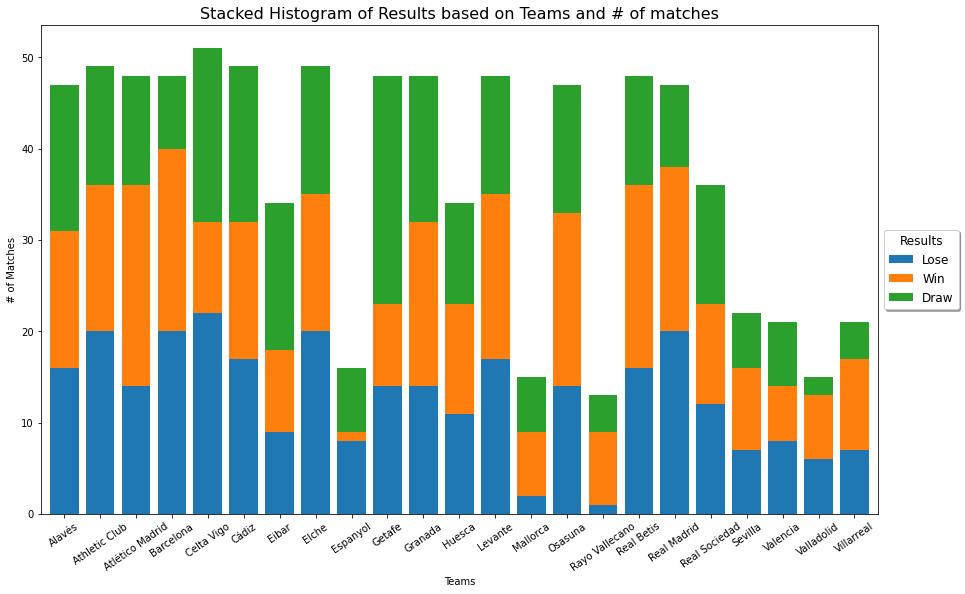

In [40]:
#Visualizing the Stacked Histogram (Using df.plot())
df_plot = df_versus.groupby(["Team", "Results"]).size().reset_index().pivot(columns="Results" , 
                                                                            index="Team", values=0)
df_plot.plot(kind="bar", stacked=True, figsize =(15,9),
rot=35,width=.8)
plt.title("Stacked Histogram of Results based on Teams and # of matches",size=16)
plt.legend(["Lose","Win","Draw"], title="Results",loc="center left",
bbox_to_anchor=(1, 0, 0.5, 1),fontsize = "large",
shadow = True,title_fontsize="large")

plt.xlabel("Teams")
plt.ylabel("# of Matches")
plt.show()


In [41]:
# index teams 
set_of_teams = set(df_versus["Team"])
team_index = {}
i=1
for team in set_of_teams : 
    team_index[team]=i
    i+=1
team_index

{'Cádiz': 1,
 'Mallorca': 2,
 'Valladolid': 3,
 'Sevilla': 4,
 'Eibar': 5,
 'Atlético Madrid': 6,
 'Celta Vigo': 7,
 'Alavés': 8,
 'Valencia': 9,
 'Huesca': 10,
 'Levante': 11,
 'Osasuna': 12,
 'Real Betis': 13,
 'Barcelona': 14,
 'Athletic Club': 15,
 'Real Sociedad': 16,
 'Granada': 17,
 'Espanyol': 18,
 'Getafe': 19,
 'Real Madrid': 20,
 'Rayo Vallecano': 21,
 'Villarreal': 22,
 'Elche': 23}

In [42]:
# update the database considering the indexes of teams : 
teams = df_versus["Team"]
opponent_teams = df_versus["Opponent_Team"]
team_indexes = []
opponent_team_indexes = []
for team in teams : 
    team_indexes.append(team_index[team])
for team in opponent_teams : 
    opponent_team_indexes.append(team_index[team])
df_versus["Team"] = pd.DataFrame(np.array(team_indexes))
df_versus["Opponent_Team"] = pd.DataFrame(np.array(opponent_team_indexes))

df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,Press,Tkl,Int,Blocks,Potential,Overall Rating,Age_y,Value,Results,Home/Away
0,Alavés_vs_Athletic_Club,2020-10-04,8,15,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,1.0,0.0,0.0,...,124.0,9.0,5.0,20.0,75.750000,73.625000,28.125000,5765625.0,1.0,1
1,Alavés_vs_Athletic_Club,2020-10-04,15,8,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0.0,0.0,0.0,...,105.0,13.0,0.0,16.0,81.700000,78.700000,26.300000,20110000.0,0.0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,8,6,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0.0,0.0,0.0,...,123.0,10.0,12.0,16.0,75.666667,71.444444,26.444444,4525000.0,0.0,1
3,Alavés_vs_Atlético_Madrid,2021-01-03,6,8,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,2.0,2.0,0.0,0.0,...,89.0,20.0,12.0,18.0,86.500000,83.000000,25.166667,48000000.0,1.0,0
4,Alavés_vs_Atlético_Madrid,2021-09-25,8,6,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",1.0,1.0,0.0,0.0,...,141.0,11.0,8.0,18.0,75.500000,72.750000,27.000000,4450000.0,2.0,1


In [43]:
# Convert the type of dates from Str to Date : 
from datetime import * 
dates = []
for i in df_versus['Date']:
    date_str = str(i).replace("-","/")
    date_obj = datetime.strptime(date_str, '%Y/%m/%d').date()
    dates.append(date_obj)
df_versus['Date']= pd.DataFrame(np.array(dates))

# Data Processing : 

In [44]:
def average_last_3(feature):
    # do the average of the "feature" in the 3 last matches of the team 
    media = []
    for date, team in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<date]
        oi = oi.loc[oi["Team"]==team]
        oi= oi.reset_index(drop=True)
        oi = oi[-3:]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["last_3_avrg_"+feature] = pd.DataFrame(np.array(media))   

def average(feature):
    # do the average of the "feature" in all the matches of the team before the match going to play it
    media = []
    for i, j in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<i]
        oi = oi.loc[oi["Team"]==j]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["avrg_"+feature] = pd.DataFrame(np.array(media))


In [45]:
# for each feature, apply the average of the last 3 matches 
features_average = df_versus.drop(columns=['Match','Date','Results','Team','Opponent_Team','Home/Away','Stadium','Crowd'])

for feature in features_average.columns:
    average_last_3(feature)
    average(feature)


In [46]:
# delete the features for the specefic match 
df_versus = df_versus.drop(columns=["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR",
    "Touches","Press","Tkl", "Int", "Blocks",'Potential','Overall Rating','Value','Age_y'])


In [47]:
df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,8,15,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,1,0.666667,0.500000,...,14.666667,15.250000,75.767857,75.714782,73.529762,73.286210,27.059524,27.072421,5.585714e+06,5.464980e+06
1,Alavés_vs_Athletic_Club,2020-10-04,15,8,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0,0.666667,0.666667,...,12.000000,12.000000,81.535450,81.535450,78.321164,78.321164,26.408995,26.408995,1.920111e+07,1.920111e+07
2,Alavés_vs_Atlético_Madrid,2021-01-03,8,6,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,1,1.666667,0.875000,...,19.666667,16.125000,75.378968,75.431746,74.093254,73.471627,28.591270,27.895337,5.665476e+06,5.340438e+06
3,Alavés_vs_Atlético_Madrid,2021-01-03,6,8,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,0,0.666667,1.857143,...,17.666667,16.142857,85.844444,85.673639,82.777778,82.726276,25.455556,26.017007,4.538889e+07,4.539481e+07
4,Alavés_vs_Atlético_Madrid,2021-09-25,8,6,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",2.0,1,1.000000,0.837209,...,17.000000,14.674419,75.378968,75.327150,73.315476,73.585022,28.035714,28.079134,4.989087e+06,5.191509e+06


Compute the difference of scores between teams playing : 

In [48]:
df_versus = df_versus.sort_values(by=['Match','Date'])
df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,8,15,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,1,0.666667,0.500000,...,14.666667,15.250000,75.767857,75.714782,73.529762,73.286210,27.059524,27.072421,5.585714e+06,5.464980e+06
1,Alavés_vs_Athletic_Club,2020-10-04,15,8,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0,0.666667,0.666667,...,12.000000,12.000000,81.535450,81.535450,78.321164,78.321164,26.408995,26.408995,1.920111e+07,1.920111e+07
2,Alavés_vs_Atlético_Madrid,2021-01-03,8,6,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,1,1.666667,0.875000,...,19.666667,16.125000,75.378968,75.431746,74.093254,73.471627,28.591270,27.895337,5.665476e+06,5.340438e+06
3,Alavés_vs_Atlético_Madrid,2021-01-03,6,8,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,0,0.666667,1.857143,...,17.666667,16.142857,85.844444,85.673639,82.777778,82.726276,25.455556,26.017007,4.538889e+07,4.539481e+07
4,Alavés_vs_Atlético_Madrid,2021-09-25,8,6,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",2.0,1,1.000000,0.837209,...,17.000000,14.674419,75.378968,75.327150,73.315476,73.585022,28.035714,28.079134,4.989087e+06,5.191509e+06


In [49]:
df_home = df_versus[df_versus['Home/Away']==1].reset_index(drop=True)
df_away = df_versus[df_versus['Home/Away']==0].reset_index(drop=True)

In [50]:
df_home.head(3)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,8,15,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,1,0.666667,0.500000,...,14.666667,15.250000,75.767857,75.714782,73.529762,73.286210,27.059524,27.072421,5.585714e+06,5.464980e+06
1,Alavés_vs_Atlético_Madrid,2021-01-03,8,6,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,1,1.666667,0.875000,...,19.666667,16.125000,75.378968,75.431746,74.093254,73.471627,28.591270,27.895337,5.665476e+06,5.340438e+06
2,Alavés_vs_Atlético_Madrid,2021-09-25,8,6,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",2.0,1,1.000000,0.837209,...,17.000000,14.674419,75.378968,75.327150,73.315476,73.585022,28.035714,28.079134,4.989087e+06,5.191509e+06


In [51]:
df_away.head(3)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Results,Home/Away,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,15,8,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0.0,0,0.666667,0.666667,...,12.000000,12.000000,81.535450,81.535450,78.321164,78.321164,26.408995,26.408995,1.920111e+07,1.920111e+07
1,Alavés_vs_Atlético_Madrid,2021-01-03,6,8,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1.0,0,0.666667,1.857143,...,17.666667,16.142857,85.844444,85.673639,82.777778,82.726276,25.455556,26.017007,4.538889e+07,4.539481e+07
2,Alavés_vs_Atlético_Madrid,2021-09-25,6,8,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",2.0,0,1.000000,1.659091,...,14.666667,14.954545,86.311111,86.003084,82.911111,82.869453,25.322222,25.575379,4.828889e+07,4.665430e+07


In [52]:
df_away_tags = df_away[['Match','Date','Team','Opponent_Team','Stadium','Crowd','Home/Away','Results']]
df_home_tags = df_home[['Match','Date','Team','Opponent_Team','Stadium','Crowd','Home/Away','Results']]
df_away_scores = df_away.drop(columns=['Match','Date','Team','Opponent_Team','Stadium','Crowd','Home/Away','Results'])
df_home_scores = df_home.drop(columns=['Match','Date','Team','Opponent_Team','Stadium','Crowd','Home/Away','Results'])

In [53]:
df_home_scores.head(3)

,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,avrg_Ast,last_3_avrg_PK,avrg_PK,last_3_avrg_PKatt,avrg_PKatt,last_3_avrg_Sh,avrg_Sh,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,0.666667,0.500000,0.333333,0.250000,0.000000,0.000000,0.000000,0.000000,6.333333,7.000000,...,14.666667,15.250000,75.767857,75.714782,73.529762,73.286210,27.059524,27.072421,5.585714e+06,5.464980e+06
1,1.666667,0.875000,1.000000,0.500000,0.333333,0.187500,0.666667,0.250000,10.000000,8.562500,...,19.666667,16.125000,75.378968,75.431746,74.093254,73.471627,28.591270,27.895337,5.665476e+06,5.340438e+06
2,1.000000,0.837209,1.000000,0.488372,0.000000,0.139535,0.333333,0.209302,10.000000,8.860465,...,17.000000,14.674419,75.378968,75.327150,73.315476,73.585022,28.035714,28.079134,4.989087e+06,5.191509e+06


In [54]:
df_away_scores.head(3)

,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,avrg_Ast,last_3_avrg_PK,avrg_PK,last_3_avrg_PKatt,avrg_PKatt,last_3_avrg_Sh,avrg_Sh,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,0.666667,0.666667,0.666667,0.666667,0.0,0.000000,0.0,0.000000,10.333333,10.333333,...,12.000000,12.000000,81.535450,81.535450,78.321164,78.321164,26.408995,26.408995,1.920111e+07,1.920111e+07
1,0.666667,1.857143,0.666667,1.500000,0.0,0.142857,0.0,0.285714,9.000000,11.857143,...,17.666667,16.142857,85.844444,85.673639,82.777778,82.726276,25.455556,26.017007,4.538889e+07,4.539481e+07
2,1.000000,1.659091,0.333333,1.386364,0.0,0.113636,0.0,0.159091,11.666667,12.159091,...,14.666667,14.954545,86.311111,86.003084,82.911111,82.869453,25.322222,25.575379,4.828889e+07,4.665430e+07


In [55]:
df_away_scores_subs = df_away_scores - df_home_scores
df_away_scores_subs.head(3)

,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,avrg_Ast,last_3_avrg_PK,avrg_PK,last_3_avrg_PKatt,avrg_PKatt,last_3_avrg_Sh,avrg_Sh,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,0.0,0.166667,0.333333,0.416667,0.000000,0.000000,0.000000,0.000000,4.000000,3.333333,...,-2.666667,-3.250000,5.767593,5.820668,4.791402,5.034954,-0.650529,-0.663426,1.361540e+07,1.373613e+07
1,-1.0,0.982143,-0.333333,1.000000,-0.333333,-0.044643,-0.666667,0.035714,-1.000000,3.294643,...,-2.000000,0.017857,10.465476,10.241893,8.684524,9.254649,-3.135714,-1.878330,3.972341e+07,4.005438e+07
2,0.0,0.821882,-0.666667,0.897992,0.000000,-0.025899,-0.333333,-0.050211,1.666667,3.298626,...,-2.333333,0.280127,10.932143,10.675934,9.595635,9.284431,-2.713492,-2.503756,4.329980e+07,4.146279e+07


In [56]:
df_home_scores_subs = df_home_scores - df_away_scores
df_home_scores_subs.head(3)

,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,avrg_Ast,last_3_avrg_PK,avrg_PK,last_3_avrg_PKatt,avrg_PKatt,last_3_avrg_Sh,avrg_Sh,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,0.0,-0.166667,-0.333333,-0.416667,0.000000,0.000000,0.000000,0.000000,-4.000000,-3.333333,...,2.666667,3.250000,-5.767593,-5.820668,-4.791402,-5.034954,0.650529,0.663426,-1.361540e+07,-1.373613e+07
1,1.0,-0.982143,0.333333,-1.000000,0.333333,0.044643,0.666667,-0.035714,1.000000,-3.294643,...,2.000000,-0.017857,-10.465476,-10.241893,-8.684524,-9.254649,3.135714,1.878330,-3.972341e+07,-4.005438e+07
2,0.0,-0.821882,0.666667,-0.897992,0.000000,0.025899,0.333333,0.050211,-1.666667,-3.298626,...,2.333333,-0.280127,-10.932143,-10.675934,-9.595635,-9.284431,2.713492,2.503756,-4.329980e+07,-4.146279e+07


In [57]:
df_final_away = pd.concat([df_away_tags,df_away_scores_subs], axis=1, sort=False)
df_final_away.head(3)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Home/Away,Results,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,15,8,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0.0,0.0,0.166667,...,-2.666667,-3.250000,5.767593,5.820668,4.791402,5.034954,-0.650529,-0.663426,1.361540e+07,1.373613e+07
1,Alavés_vs_Atlético_Madrid,2021-01-03,6,8,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,1.0,-1.0,0.982143,...,-2.000000,0.017857,10.465476,10.241893,8.684524,9.254649,-3.135714,-1.878330,3.972341e+07,4.005438e+07
2,Alavés_vs_Atlético_Madrid,2021-09-25,6,8,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",0,2.0,0.0,0.821882,...,-2.333333,0.280127,10.932143,10.675934,9.595635,9.284431,-2.713492,-2.503756,4.329980e+07,4.146279e+07


In [58]:
df_final_home = pd.concat([df_home_tags,df_home_scores_subs], axis=1, sort=False)
df_final_home.head(3)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Home/Away,Results,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,8,15,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,1.0,0.0,-0.166667,...,2.666667,3.250000,-5.767593,-5.820668,-4.791402,-5.034954,0.650529,0.663426,-1.361540e+07,-1.373613e+07
1,Alavés_vs_Atlético_Madrid,2021-01-03,8,6,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,0.0,1.0,-0.982143,...,2.000000,-0.017857,-10.465476,-10.241893,-8.684524,-9.254649,3.135714,1.878330,-3.972341e+07,-4.005438e+07
2,Alavés_vs_Atlético_Madrid,2021-09-25,8,6,"Estadio de Mendizorroza, Vitoria-Gasteiz","9,836",1,2.0,0.0,-0.821882,...,2.333333,-0.280127,-10.932143,-10.675934,-9.595635,-9.284431,2.713492,2.503756,-4.329980e+07,-4.146279e+07


In [59]:
df_final = df_final_home.append(df_final_away)
df_final = df_final.sort_values(by=['Match','Date'])
df_final.head(3)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Home/Away,Results,last_3_avrg_Gls,avrg_Gls,...,last_3_avrg_Blocks,avrg_Blocks,last_3_avrg_Potential,avrg_Potential,last_3_avrg_Overall Rating,avrg_Overall Rating,last_3_avrg_Age_y,avrg_Age_y,last_3_avrg_Value,avrg_Value
0,Alavés_vs_Athletic_Club,2020-10-04,8,15,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,1.0,0.0,-0.166667,...,2.666667,3.250000,-5.767593,-5.820668,-4.791402,-5.034954,0.650529,0.663426,-1.361540e+07,-1.373613e+07
0,Alavés_vs_Athletic_Club,2020-10-04,15,8,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0.0,0.0,0.166667,...,-2.666667,-3.250000,5.767593,5.820668,4.791402,5.034954,-0.650529,-0.663426,1.361540e+07,1.373613e+07
1,Alavés_vs_Atlético_Madrid,2021-01-03,8,6,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,0.0,1.0,-0.982143,...,2.000000,-0.017857,-10.465476,-10.241893,-8.684524,-9.254649,3.135714,1.878330,-3.972341e+07,-4.005438e+07


In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 539
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Match                       1080 non-null   object 
 1   Date                        1080 non-null   object 
 2   Team                        1080 non-null   int64  
 3   Opponent_Team               1080 non-null   int64  
 4   Stadium                     1080 non-null   object 
 5   Crowd                       1080 non-null   object 
 6   Home/Away                   1080 non-null   int64  
 7   Results                     854 non-null    float64
 8   last_3_avrg_Gls             1048 non-null   float64
 9   avrg_Gls                    1048 non-null   float64
 10  last_3_avrg_Ast             1048 non-null   float64
 11  avrg_Ast                    1048 non-null   float64
 12  last_3_avrg_PK              1048 non-null   float64
 13  avrg_PK                     1048 n

# Testing different Models : 

In [61]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [71]:
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final.dropna(how='any', inplace=True)

In [72]:
X = df_final.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [73]:
clf_logistic = LogisticRegression()

acc_logistic = []
for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    

    clf_logistic.fit(X_train, Y_train)
    y_hat_logistic = clf_logistic.predict(X_test)
    acc_logistic.append(accuracy_score(y_test,y_hat_logistic))

   


print("Logistic Regression : ",np.array(acc_logistic).mean())


Logistic Regression :  0.3361842105263158


In [74]:

clf_svm = svm.SVC()

acc_svm = []
for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
   

    clf_svm.fit(X_train, Y_train)
    y_hat_svm = clf_svm.predict(X_test)
    acc_svm.append(accuracy_score(y_test,y_hat_svm))  

print("SVM : ", np.array(acc_svm).mean())


SVM :  0.3505394736842105


In [75]:
clf_KNN = KNeighborsClassifier()

acc_KNN = []

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    

    clf_KNN.fit(X_train, Y_train)
    y_hat_KNN = clf_KNN.predict(X_test)
    acc_KNN.append(accuracy_score(y_test,y_hat_KNN)) 


print("KNN : ",np.array(acc_KNN).mean())



KNN :  0.3575592105263158


In [160]:
clf_random = RandomForestClassifier()

acc_random = []

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    clf_random.fit(X_train, Y_train)
    y_hat_random = clf_random.predict(X_test)
    acc_random.append(accuracy_score(y_test,y_hat_random)) 

print("Random Forest : ", np.array(acc_random).mean())



Random Forest :  0.4584407894736842


In [155]:
X = df_final.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
clf_logistic_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)
acc_logistic_lasso = []
# In the first step we will split the data in training and remaining dataset
X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

# We split the remaining dataset between valid and test dataset
X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)

clf_logistic_lasso.fit(X_train, Y_train)
y_hat_logistic_lasso = clf_logistic_lasso.predict(X_test)
acc_logistic_lasso.append(accuracy_score(y_test,y_hat_logistic_lasso))

print("Logistic Regression with Lasso regularization : ",np.array(acc_logistic_lasso).mean())

Logistic Regression with Lasso regularization :  0.5263157894736842


# Feature Engineering : 

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import time
from sklearn.preprocessing import MinMaxScaler

 Clf result : 0.355, +/- 0.023 N_features : 1
 Clf result : 0.358, +/- 0.024 N_features : 2
 Clf result : 0.342, +/- 0.012 N_features : 3
 Clf result : 0.325, +/- 0.030 N_features : 4
 Clf result : 0.352, +/- 0.022 N_features : 5
 Clf result : 0.356, +/- 0.024 N_features : 6
 Clf result : 0.348, +/- 0.025 N_features : 7
 Clf result : 0.330, +/- 0.036 N_features : 8
 Clf result : 0.350, +/- 0.033 N_features : 9
 Clf result : 0.347, +/- 0.039 N_features : 10
 Clf result : 0.343, +/- 0.040 N_features : 11
 Clf result : 0.350, +/- 0.036 N_features : 12
 Clf result : 0.343, +/- 0.025 N_features : 13
 Clf result : 0.337, +/- 0.031 N_features : 14
 Clf result : 0.332, +/- 0.025 N_features : 15
 Clf result : 0.328, +/- 0.029 N_features : 16
 Clf result : 0.325, +/- 0.024 N_features : 17
 Clf result : 0.333, +/- 0.029 N_features : 18
 Clf result : 0.330, +/- 0.028 N_features : 19
 Clf result : 0.322, +/- 0.042 N_features : 20
 Clf result : 0.327, +/- 0.043 N_features : 21
 Clf result : 0.323, +

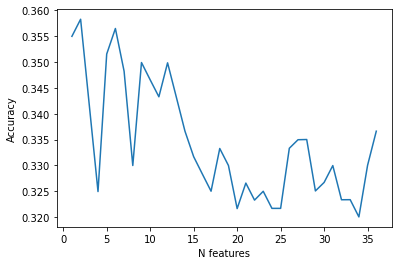

In [78]:
acc_results = []
n_features = []

clf = LogisticRegression(max_iter =2000, multi_class = 'multinomial')

#Implementing recursive feature elimination on LR
for i in range(1, len(X.columns)):
    rfe = RFE(estimator = clf, n_features_to_select = i, step=1)
    rfe.fit(X, Y)
    X_temp = rfe.transform(X)

    np.random.seed(2022)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,Y, test_size = 0.2)
    scaler = MinMaxScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    start = time.time()
    scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +/- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [79]:
#Obtaining the best 13 features for the LogReg model
rfe = RFE(estimator = clf, n_features_to_select = 13, step=1)
rfe.fit(X, Y)
X_transformed = rfe.transform(X)

np.random.seed(2022)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size = 0.3)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


#getting column names
featured_columns = pd.DataFrame(rfe.support_,index = X.columns, columns=['is_in'])

featured_columns_log = featured_columns[featured_columns.is_in == True].index.tolist()
featured_columns_log

['Team',
 'Opponent_Team',
 'last_3_avrg_Sh',
 'last_3_avrg_SoT',
 'last_3_avrg_Touches',
 'avrg_Touches',
 'avrg_Press',
 'last_3_avrg_Int',
 'last_3_avrg_Blocks',
 'avrg_Blocks',
 'last_3_avrg_Age_y',
 'last_3_avrg_Value',
 'avrg_Value']

 Clf result : 0.330, +/- 0.017 N_features : 5
 Clf result : 0.375, +/- 0.051 N_features : 6
 Clf result : 0.363, +/- 0.047 N_features : 7
 Clf result : 0.370, +/- 0.040 N_features : 8
 Clf result : 0.343, +/- 0.040 N_features : 9
 Clf result : 0.327, +/- 0.041 N_features : 10
 Clf result : 0.333, +/- 0.033 N_features : 11
 Clf result : 0.327, +/- 0.026 N_features : 12
 Clf result : 0.338, +/- 0.026 N_features : 13
 Clf result : 0.330, +/- 0.020 N_features : 14
 Clf result : 0.333, +/- 0.032 N_features : 15
 Clf result : 0.315, +/- 0.043 N_features : 16
 Clf result : 0.328, +/- 0.035 N_features : 17
 Clf result : 0.320, +/- 0.033 N_features : 18
 Clf result : 0.332, +/- 0.037 N_features : 19
 Clf result : 0.317, +/- 0.012 N_features : 20
 Clf result : 0.317, +/- 0.035 N_features : 21
 Clf result : 0.305, +/- 0.030 N_features : 22
 Clf result : 0.317, +/- 0.015 N_features : 23
 Clf result : 0.327, +/- 0.031 N_features : 24
 Clf result : 0.327, +/- 0.035 N_features : 25
 Clf result : 0.33

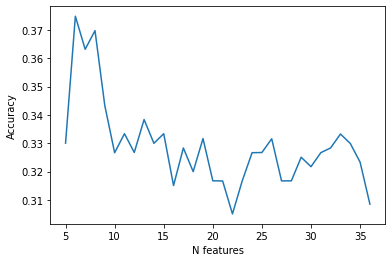

In [80]:
acc_results = []
n_features = []

#Selecting Random Forest
clf = RandomForestClassifier()
X = df_final.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

#Implementing recursive feature elimination on RF
for i in range(5, len(X.columns)):
    rfe = RFE(estimator = clf, n_features_to_select = i, step=1)
    rfe.fit(X, Y)
    X_temp = rfe.transform(X)

    np.random.seed(2022)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,Y, test_size = 0.2)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    start = time.time()
    scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +/- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [143]:
#Obtaining the best 6 features for the Random Forest Model 
rfe = RFE(estimator = clf, n_features_to_select = 6, step=1)
rfe.fit(X, Y)
X_transformed = rfe.transform(X)

np.random.seed(2022)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size = 0.3)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


#getting column names
featured_columns = pd.DataFrame(rfe.support_,index = X.columns, columns=['is_in'])

featured_columns_RF = featured_columns[featured_columns.is_in == True].index.tolist()
featured_columns_RF

['avrg_Ast',
 'avrg_Sh',
 'last_3_avrg_Touches',
 'avrg_Touches',
 'avrg_Press',
 'avrg_Tkl',
 'avrg_Int',
 'last_3_avrg_Value',
 'avrg_Value']

In [ ]:
# feature selection for SVM 

# Testing Models with the selected features of the data for each model: 

## General Testing Accuracy

In [140]:
clf_logistic = LogisticRegression()


X = df_final[featured_columns_log]
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

acc_logistic = []

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    
    clf_logistic.fit(X_train, Y_train)
    y_hat_logistic = clf_logistic.predict(X_test)
    acc_logistic.append(accuracy_score(y_test,y_hat_logistic))

      

print("Logistic Regression : ",np.array(acc_logistic).mean())


Logistic Regression :  0.4690394736842105


In [144]:
clf_random = RandomForestClassifier()


X = df_final[featured_columns_RF]
Y = df_final['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

acc_random = []

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    
    clf_random.fit(X_train, Y_train)
    y_hat_random = clf_random.predict(X_test)
    acc_random.append(accuracy_score(y_test,y_hat_random))

      

print("Random Forest : ",np.array(acc_random).mean())


Random Forest :  0.45202631578947366


In [ ]:
# testing with SVM with selected features 

## Testing Accuracy of Real Madrid matches 

In [145]:
# Real Madrid matches' prediction with Random Forest : 
clf_random = RandomForestClassifier()
acc_random_real = []
real = df_final[df_final["Team"]==18]
real = real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_real = real[featured_columns_RF]
Y_real = real['Results']

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train_real, X_remain_real, Y_train_real, Y_remain_real = train_test_split(X_real, Y_real, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid_real, X_test_real, y_valid_real, y_test_real = train_test_split(X_remain_real,Y_remain_real, test_size=0.5)
    
    clf_random.fit(X_train_real, Y_train_real)
    y_hat_random_real = clf_random.predict(X_test_real)
    acc_random_real.append(accuracy_score(y_test_real,y_hat_random_real))

print("Prediction of Random Forst of Real Madrid matches :",np.array(acc_random_real).mean())



Prediction of Random Forst of Real Madrid matches : 0.51825


In [141]:
# Real Madrid matches' prediction with Logistic Regression : 
clf_logistic = LogisticRegression()
acc_log_real = []
real = df_final[df_final["Team"]==18]
real = real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_real = real[featured_columns_log]
Y_real = real['Results']

for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train_real, X_remain_real, Y_train_real, Y_remain_real = train_test_split(X_real, Y_real, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid_real, X_test_real, y_valid_real, y_test_real = train_test_split(X_remain_real,Y_remain_real, test_size=0.5)
    
    clf_logistic.fit(X_train_real, Y_train_real)
    y_hat_logistic_real = clf_logistic.predict(X_test_real)
    acc_log_real.append(accuracy_score(y_test_real,y_hat_logistic_real))

print("Prediction of Logistic Regression of Real Madrid matches :",np.array(acc_log_real).mean())



Prediction of Logistic Regression of Real Madrid matches : 0.560375


### Knowing Eibar's stats and Real Madrid's stats, what is the accuracy of the predicted result of their match ?

In [146]:
# DATA FOR RANDOM FOREST 

# get the real madrid index :
real_index = team_index['Real Madrid']
# get Eibar index : 
eibar_index = team_index['Eibar']
# get the data of both teams
X_real = df_final[df_final["Team"]==real_index] 
X_eibar = df_final[df_final["Team"]==eibar_index]
# delete the match between both teams from the data to train
X_real = X_real.drop(X_real[X_real['Match']=='Real_Madrid_vs_Eibar'].index) 
X_eibar = X_eibar.drop(X_eibar[X_eibar['Match']=='Real_Madrid_vs_Eibar'].index)
# clean the data
X_real = X_real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_eibar = X_eibar.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# data to train : 
Y_real = X_real['Results']
Y_eibar = X_eibar['Results']
X_real = X_real[featured_columns_RF]
X_eibar = X_eibar[featured_columns_RF]

X_real_eibar = X_real.append(X_eibar)
Y_real_eibar = Y_real.append(Y_eibar)
test = df_final[df_final["Match"]=="Real_Madrid_vs_Eibar"]
X_real_eibar_test = test[featured_columns_RF]
Y_real_eibar_test = test[['Results']]

In [147]:
clf_random = RandomForestClassifier()
clf_random.fit(X_real_eibar, Y_real_eibar)
y_hat_random_real_eibar = clf_random.predict(X_real_eibar_test)
testing_score = accuracy_score(Y_real_eibar_test,y_hat_random_real_eibar)
print("Accuracy of Random Forst on the Match Real Madrid vs Eibar knowing previous matches of both teams:", testing_score)

Accuracy of Random Forst on the Match Real Madrid vs Eibar knowing previous matches of both teams: 1.0


In [148]:
# DATA FOR Logistic Regression

# get the real madrid index :
real_index = team_index['Real Madrid']
# get Eibar index : 
eibar_index = team_index['Eibar']
# get the data of both teams
X_real = df_final[df_final["Team"]==real_index] 
X_eibar = df_final[df_final["Team"]==eibar_index]
# delete the match between both teams from the data to train
X_real = X_real.drop(X_real[X_real['Match']=='Real_Madrid_vs_Eibar'].index) 
X_eibar = X_eibar.drop(X_eibar[X_eibar['Match']=='Real_Madrid_vs_Eibar'].index)
# clean the data
X_real = X_real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_eibar = X_eibar.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# data to train : 
Y_real = X_real['Results']
Y_eibar = X_eibar['Results']
X_real = X_real[featured_columns_log]
X_eibar = X_eibar[featured_columns_log]

X_real_eibar = X_real.append(X_eibar)
Y_real_eibar = Y_real.append(Y_eibar)
test = df_final[df_final["Match"]=="Real_Madrid_vs_Eibar"]
X_real_eibar_test = test[featured_columns_log]
Y_real_eibar_test = test[['Results']]

In [149]:
clf_logistic = LogisticRegression()
clf_logistic.fit(X_real_eibar, Y_real_eibar)
y_hat_random_real_eibar = clf_logistic.predict(X_real_eibar_test)
testing_score = accuracy_score(Y_real_eibar_test,y_hat_random_real_eibar)
print("Accuracy of Logistic Regression on the Match Real Madrid vs Eibar knowing previous matches of both teams:", testing_score)

Accuracy of Logistic Regression on the Match Real Madrid vs Eibar knowing previous matches of both teams: 1.0


### Knowing Atletico Madrid's stats and Real Madrid's stats, what is the accuracy of the predicted result of their match ?

In [150]:
# Data For Random Forest : 
# get the real madrid index :
real_index = team_index['Real Madrid']
# get Eibar index : 
atletico_index = team_index['Atlético Madrid']
# get the data of both teams
X_real = df_final[df_final["Team"]==real_index] 
X_atletico = df_final[df_final["Team"]==atletico_index]
# delete the match between both teams from the data to train
X_real = X_real.drop(X_real[X_real['Match']=='Real_Madrid_vs_Eibar'].index) 
X_atletico = X_atletico.drop(X_atletico[X_atletico['Match']=='Real_Madrid_vs_Eibar'].index)
# clean the data
X_real = X_real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_atletico = X_atletico.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# data to train : 
Y_real = X_real['Results']
Y_atletico = X_atletico['Results']
X_real = X_real[featured_columns_RF]
X_atletico = X_atletico[featured_columns_RF]

X_real_atletico = X_real.append(X_atletico)
Y_real_atletico = Y_real.append(Y_atletico)
test = df_final[df_final["Match"]=="Real_Madrid_vs_Atlético_Madrid"]
X_real_atletico_test = test[featured_columns_RF]
Y_real_atletico_test = test[['Results']]

In [151]:
clf_random = RandomForestClassifier()
clf_random.fit(X_real_atletico, Y_real_atletico)
y_hat_random_real_atletico = clf_random.predict(X_real_atletico_test)
testing_score = accuracy_score(Y_real_atletico_test,y_hat_random_real_atletico)
print("Accuracy of Random Forst on the Match Real Madrid vs Atletico Madrid knowing previous matches of both teams:", testing_score)

Accuracy of Random Forst on the Match Real Madrid vs Atletico Madrid knowing previous matches of both teams: 1.0


In [152]:
# Data For Logistic Regression : 
# get the real madrid index :
real_index = team_index['Real Madrid']
# get Eibar index : 
atletico_index = team_index['Atlético Madrid']
# get the data of both teams
X_real = df_final[df_final["Team"]==real_index] 
X_atletico = df_final[df_final["Team"]==atletico_index]
# delete the match between both teams from the data to train
X_real = X_real.drop(X_real[X_real['Match']=='Real_Madrid_vs_Eibar'].index) 
X_atletico = X_atletico.drop(X_atletico[X_atletico['Match']=='Real_Madrid_vs_Eibar'].index)
# clean the data
X_real = X_real.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_atletico = X_atletico.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# data to train : 
Y_real = X_real['Results']
Y_atletico = X_atletico['Results']
X_real = X_real[featured_columns_log]
X_atletico = X_atletico[featured_columns_log]

X_real_atletico = X_real.append(X_atletico)
Y_real_atletico = Y_real.append(Y_atletico)
test = df_final[df_final["Match"]=="Real_Madrid_vs_Atlético_Madrid"]
X_real_atletico_test = test[featured_columns_log]
Y_real_atletico_test = test[['Results']]

In [153]:
clf_logistic = LogisticRegression()
clf_logistic.fit(X_real_atletico, Y_real_atletico)
y_hat_random_real_atletico = clf_logistic.predict(X_real_atletico_test)
testing_score = accuracy_score(Y_real_atletico_test,y_hat_random_real_atletico)
print("Accuracy of Logistic Regression on the Match Real Madrid vs Atletico Madrid knowing previous matches of both teams:", testing_score)

Accuracy of Logistic Regression on the Match Real Madrid vs Atletico Madrid knowing previous matches of both teams: 0.5
